In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
from collections import Counter
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import AdaBoostRegressor, GradientBoostingRegressor
import pickle

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset4/main/medical_cost_insurance.csv')

In [3]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


**Health insurance** is a type of insurance that covers medical expenses that arise due to an illness. These expenses could be related to **hospitalisation costs**, **cost of medicines** or **doctor consultation fees**. The main purpose of medical insurance is to receive the **best medical care** without any strain on your **finances**. Health insurance plans offer **protection against high medical costs**. It covers hospitalization expenses, day care procedures, domiciliary expenses, and ambulance charges, besides many others. Based on certain input features such as age , bmi,,no of dependents ,smoker ,region  medical insurance is calculated .

In [4]:
df.shape

(1338, 7)

**The dataset has 1338 rows and 7 columns**

In [5]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

**Columns**                                          

* **age:** age of primary beneficiary

* **sex:** beneficiary gender (female or male)

* **bmi:** Body mass index, providing an understanding of body, weights that are relatively high or low relative to height,         objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9.

* **children:** Number of children covered by health insurance / Number of dependents

* **smoker:** Smoker or Non-smoker

* **region:** the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.
* **charges:** Individual medical costs billed by health insurance

In [6]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [7]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [8]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

No missing values. Good to proceed further

# Data Analysis

*           **a) Categorical Variables**

Counter({'female': 662, 'male': 676})

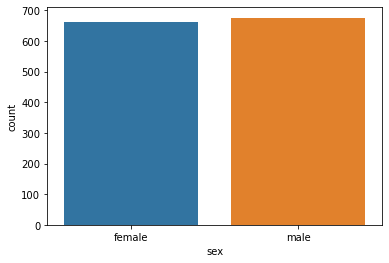

In [9]:
sns.countplot(df['sex'])
Counter(df['sex'])

Almost equal amount male and females are there in the given dataset

Counter({0: 574, 1: 324, 3: 157, 2: 240, 5: 18, 4: 25})

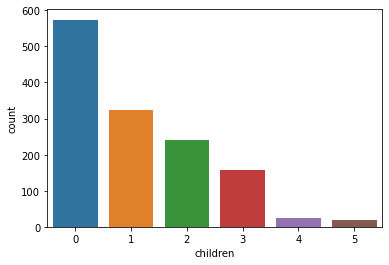

In [10]:
sns.countplot(df['children'])
Counter(df['children'])

**Out of 1338 clients, 574 have no child, 324 have single child and remaining have more than one child**

Counter({'yes': 274, 'no': 1064})

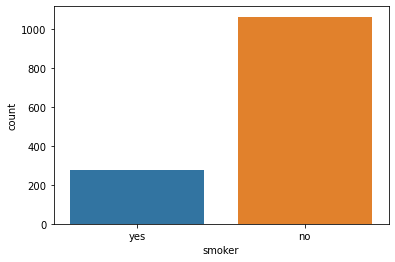

In [11]:
sns.countplot(df['smoker'])
Counter(df['smoker'])

**Majority of non-smokers are there in the given dataset**

Counter({'southwest': 325,
         'southeast': 364,
         'northwest': 325,
         'northeast': 324})

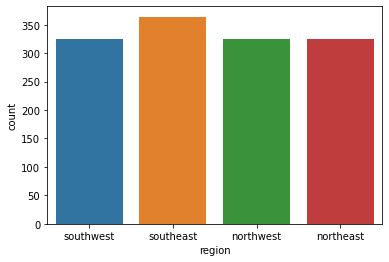

In [12]:
sns.countplot(df['region'])
Counter(df['region'])

**We observe almost equal number of clients from each region in the given dataset**

* **b) Continuous Variable**

<AxesSubplot:xlabel='age', ylabel='Density'>

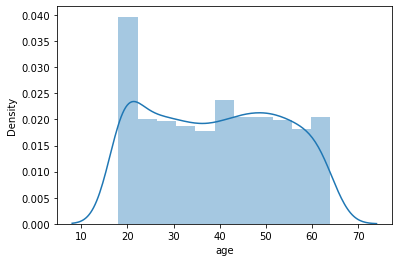

In [13]:
sns.distplot(df['age'])

<AxesSubplot:xlabel='bmi', ylabel='Density'>

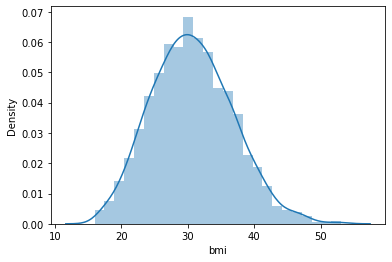

In [14]:
sns.distplot(df['bmi'])

**We observe a perfect bell curve for bmi data distribution**

<AxesSubplot:xlabel='charges', ylabel='Density'>

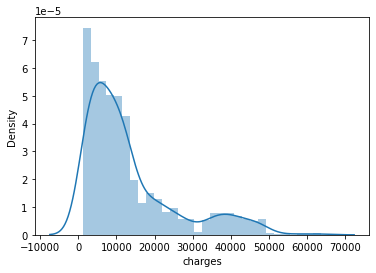

In [15]:
sns.distplot(df['charges'])

**We observe the data of our target variable is positively skewed**

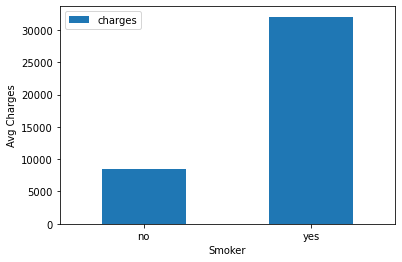

In [16]:
age_cost = df.pivot_table(index='smoker',values='charges')
age_cost.plot(kind='bar')
plt.xlabel('Smoker')
plt.ylabel('Avg Charges')
plt.xticks(rotation=0)
plt.show()

**Medical insurance cost for smoker category is much higher than the non smoker category and hence charges data seems to be positively skewed**

# Correlation

<AxesSubplot:>

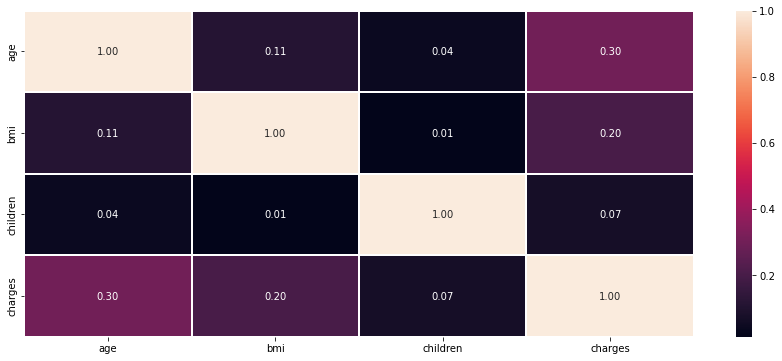

In [17]:
plt.figure(figsize=(15,6))
sns.heatmap(df.corr(),annot =True,linewidths=0.25,linecolor='white',fmt="0.2f")

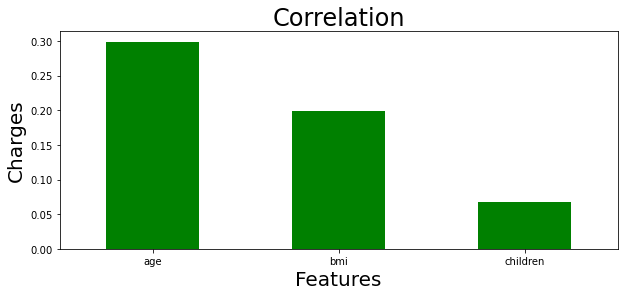

In [18]:
plt.figure(figsize = (10,4))
df.corr()['charges'].sort_values(ascending=False).drop(['charges']).plot(kind ='bar',color='g')
plt.xlabel('Features',fontsize = 20)
plt.ylabel('Charges', fontsize =20)
plt.title('Correlation',fontsize=24)
plt.xticks(rotation=0)
plt.show()

In [19]:
df.skew()

age         0.055673
bmi         0.284047
children    0.938380
charges     1.515880
dtype: float64

**Keeping +/-0.5 as the range of skewness, here are the columns which does not lie within this range.**

* **chidren** -Categorical
* **charges** - target variale

**Since no continuous column has skewness, we will not treat that.**

In [20]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


**sex,smoker and region** needs to be encoded into numbers

# Encoding of categorical variables

In [21]:
from sklearn.preprocessing import OrdinalEncoder

In [22]:
oen = OrdinalEncoder()

In [23]:
for i in df.columns:
    if df[i].dtypes == "object":
        df[i] = oen.fit_transform(df[i].values.reshape(-1,1))

In [24]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0.0,27.900,0,1.0,3.0,16884.92400
1,18,1.0,33.770,1,0.0,2.0,1725.55230
2,28,1.0,33.000,3,0.0,2.0,4449.46200
3,33,1.0,22.705,0,0.0,1.0,21984.47061
4,32,1.0,28.880,0,0.0,1.0,3866.85520


# Scaling the data using StandardScaler

In [25]:
from sklearn.preprocessing import StandardScaler

In [26]:
X = df.drop('charges',axis=1)
y = df['charges']

In [27]:
X

,age,sex,bmi,children,smoker,region
0,19,0.0,27.900,0,1.0,3.0
1,18,1.0,33.770,1,0.0,2.0
2,28,1.0,33.000,3,0.0,2.0
3,33,1.0,22.705,0,0.0,1.0
4,32,1.0,28.880,0,0.0,1.0
...,...,...,...,...,...,...
1333,50,1.0,30.970,3,0.0,1.0
1334,18,0.0,31.920,0,0.0,0.0
1335,18,0.0,36.850,0,0.0,2.0
1336,21,0.0,25.800,0,0.0,3.0


In [28]:
scaler = StandardScaler()

In [29]:
X_scaled = scaler.fit_transform(X)

In [30]:
X_scaled

array([[-1.43876426, -1.0105187 , -0.45332   , -0.90861367,  1.97058663,
         1.34390459],
       [-1.50996545,  0.98959079,  0.5096211 , -0.07876719, -0.5074631 ,
         0.43849455],
       [-0.79795355,  0.98959079,  0.38330685,  1.58092576, -0.5074631 ,
         0.43849455],
       ...,
       [-1.50996545, -1.0105187 ,  1.0148781 , -0.90861367, -0.5074631 ,
         0.43849455],
       [-1.29636188, -1.0105187 , -0.79781341, -0.90861367, -0.5074631 ,
         1.34390459],
       [ 1.55168573, -1.0105187 , -0.26138796, -0.90861367,  1.97058663,
        -0.46691549]])

# Checking multicollinearity using variance inflation factor

In [32]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['vif'] = [variance_inflation_factor(X_scaled,i) for i in range(X_scaled.shape[1])]
vif['Features'] = X.columns

vif

,vif,Features
0,1.015394,age
1,1.008889,sex
2,1.040608,bmi
3,1.002482,children
4,1.006466,smoker
5,1.025966,region


**All the vif values are less than 5 and very low.That means there is no multicollinearity problem exist in this dataset. Now we will find the best random state.**

# Best Random State

In [33]:
maxR2score = 0 # Max R2 score
maxRS = 0   # Best random state for which maximum r2 score is achieved

for i in range(1,100):
    X_train,X_test,y_train,y_test = train_test_split(X_scaled,y,test_size=0.2,random_state=i)
    
    lr = LinearRegression()
    
    lr.fit(X_train,y_train)
    
    pred_lr = lr.predict(X_test)
   
    score_lr = r2_score(y_test,pred_lr)
    
    print("R2 Score: ",score_lr,"at random state", i)
   
    
    if score_lr>maxR2score:
   
        maxR2score = score_lr
              
        maxRS = i
        
        print("Maximum R2 Score:",maxR2score,"at random state ", maxRS)
       

R2 Score:  0.7623224022563388 at random state 1
Maximum R2 Score: 0.7623224022563388 at random state  1
R2 Score:  0.7445422986536503 at random state 2
R2 Score:  0.7406256738597918 at random state 3
R2 Score:  0.6970099489172212 at random state 4
R2 Score:  0.7790865933969187 at random state 5
Maximum R2 Score: 0.7790865933969187 at random state  5
R2 Score:  0.7785295914318422 at random state 6
R2 Score:  0.7644939656224732 at random state 7
R2 Score:  0.7250569658128251 at random state 8
R2 Score:  0.7778683760574732 at random state 9
R2 Score:  0.6957010622294885 at random state 10
R2 Score:  0.7993819717035826 at random state 11
Maximum R2 Score: 0.7993819717035826 at random state  11
R2 Score:  0.7096380405273459 at random state 12
R2 Score:  0.7989255552370543 at random state 13
R2 Score:  0.7294640312702891 at random state 14
R2 Score:  0.7708744759820262 at random state 15
R2 Score:  0.7075292952600163 at random state 16
R2 Score:  0.7342745730232989 at random state 17
R2 Scor

In [34]:
print("Best R2 Score is ",maxR2score*100, "on random state", maxRS)

Best R2 Score is  79.93958934706319 on random state 47


**For Linear Regression model we get best random state at 47 and r2 score is 79.939%.**

# Linear Regression Model

In [35]:
lr = LinearRegression()

X_train,X_test,y_train,y_test = train_test_split(X_scaled,y,test_size=0.2,random_state=47)

lr.fit(X_train,y_train)

pred_train = lr.predict(X_train)

pred_test = lr.predict(X_test)

score_train = r2_score(y_train,pred_train)

score_test = r2_score(y_test,pred_test)

print("Training accuracy:",score_train*100)

print("Testing accuracy:",score_test*100)

Training accuracy: 73.76059448076364
Testing accuracy: 79.93958934706319


# Cross validation of model

In [36]:
Training_accuracy = r2_score(y_train,pred_train)
Testing_accuracy = r2_score(y_test,pred_test)

from sklearn.model_selection import cross_val_score
for j in range(2,10):
    cv_score = cross_val_score(lr,X_scaled,y,cv=j)
    cv_mean = cv_score.mean()
    print(f"At cross fold {j}, the cv score is {cv_mean} and accuracy score for training is {Training_accuracy} and accuracy for testing is {Testing_accuracy}")
    print("/n")

At cross fold 2, the cv score is 0.7486033254037109 and accuracy score for training is 0.7376059448076364 and accuracy for testing is 0.7993958934706319
/n
At cross fold 3, the cv score is 0.7448455049684157 and accuracy score for training is 0.7376059448076364 and accuracy for testing is 0.7993958934706319
/n
At cross fold 4, the cv score is 0.7465374465214439 and accuracy score for training is 0.7376059448076364 and accuracy for testing is 0.7993958934706319
/n
At cross fold 5, the cv score is 0.7472559473580954 and accuracy score for training is 0.7376059448076364 and accuracy for testing is 0.7993958934706319
/n
At cross fold 6, the cv score is 0.7458863313669325 and accuracy score for training is 0.7376059448076364 and accuracy for testing is 0.7993958934706319
/n
At cross fold 7, the cv score is 0.7452991860582022 and accuracy score for training is 0.7376059448076364 and accuracy for testing is 0.7993958934706319
/n
At cross fold 8, the cv score is 0.7430633572874522 and accuracy

Since cv score is maximum at cv=2, we will take cv = 2

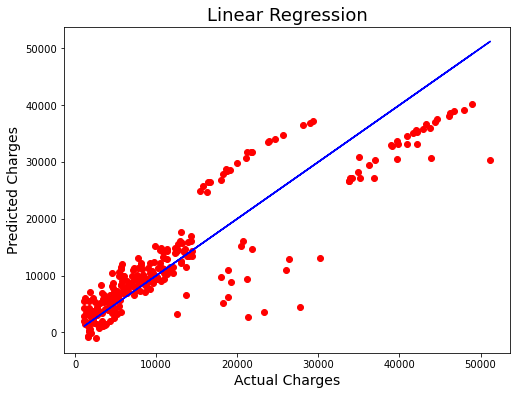

In [37]:
# Plotting Predicted vs Actual charges
plt.figure(figsize=(8,6))
plt.scatter(y_test,pred_test,color ='r')
plt.plot(y_test,y_test,color ='b')
plt.xlabel('Actual Charges',fontsize = 14)
plt.ylabel('Predicted Charges',fontsize =14)
plt.title('Linear Regression',fontsize = 18)
plt.savefig('lr.png')
plt.show()

# Model Evaluation

In [38]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0.0,27.900,0,1.0,3.0,16884.92400
1,18,1.0,33.770,1,0.0,2.0,1725.55230
2,28,1.0,33.000,3,0.0,2.0,4449.46200
3,33,1.0,22.705,0,0.0,1.0,21984.47061
4,32,1.0,28.880,0,0.0,1.0,3866.85520


In [39]:
# MAE - represents avarage error

mae = mean_absolute_error(y_test,pred_test)

# MSE - ignoring some outliers means larger errors are punished. Hard to interpretate but most popular

mse = mean_squared_error(y_test,pred_test)

# RMSE

rmse = np.sqrt(mse)

print("Mean absolute Error:",mae)

print("Mean Squared Error:",mse)

print("Root mean squared Error:",rmse)

Mean absolute Error: 3869.7515370573915
Mean Squared Error: 30706067.414313678
Root mean squared Error: 5541.305569476716


**High values of error suggest that the Linear regression model is not fit for the given dataset**

# Lasso Regularization

In [40]:
from sklearn.linear_model import Lasso,Ridge,LassoCV,RidgeCV

In [41]:
#LassoCV will return best alpha after max iteration
#Normalize is subtracting the mean and dividing by the L2 norm
lasscv = LassoCV(alphas = None, max_iter = 100, normalize = True)
lasscv.fit(X_train,y_train)

LassoCV(max_iter=100, normalize=True)

In [42]:
#Best alpha parameter
alpha = lasscv.alpha_
alpha

0.28558836853618275

In [43]:
lasso_reg =Lasso(alpha)
lasso_reg.fit(X_train,y_train)

Lasso(alpha=0.28558836853618275)

In [44]:
pred_test = lasso_reg.predict(X_test)

In [46]:
lasso_reg.score(X_test,y_test)

0.7993934406609424

# Ridge Regularization

In [47]:
ridgecv = RidgeCV(alphas= np.arange(.001,0.1,.01),normalize = True)
ridgecv.fit(X_train,y_train)

RidgeCV(alphas=array([0.001, 0.011, 0.021, 0.031, 0.041, 0.051, 0.061, 0.071, 0.081,
       0.091]),
        normalize=True)

In [48]:
alpha = ridgecv.alpha_
alpha

0.001

In [49]:
ridge_reg = Ridge(alpha)
ridge_reg.fit(X_train,y_train)

Ridge(alpha=0.001)

In [50]:
ridge_reg.score(X_test,y_test)

0.7993958502045915

**We got around same R2 score using Lasso and ridge regression. So it's safe to say that there is no overfitting.**

# Ensemble technique - Random Forest Regressor

In [58]:
rf = RandomForestRegressor()

rf.fit(X_train,y_train)

rf.score(X_train,y_train)

pred_test = rf.predict(X_test)

rfs = r2_score(y_test,pred_test)

print("R2 score:",rfs*100)

rf_score = cross_val_score(rf,X_scaled,y,cv=5)

rfc = rf_score.mean()

print("Cross val score:",rfc*100)

R2 score: 86.3626648085464
Cross val score: 83.57553270151477


# Hyperparameter Tuning

In [59]:
# For Random Forest Regressor

params_rf = {'criterion':['mse','mae'],
             'min_samples_split':range(4,9),
             'max_features':['auto','sqrt','log2'],
             'max_samples':(0.1,0.2,0.25)}

grd_rf = GridSearchCV(rf,params_rf)

grd_rf.fit(X_train,y_train)

print(grd_rf.best_params_)

{'criterion': 'mse', 'max_features': 'auto', 'max_samples': 0.25, 'min_samples_split': 4}


In [60]:
rf = grd_rf.best_estimator_

rf.fit(X_train,y_train)

rf.score(X_train,y_train)

pred_test = rf.predict(X_test)

rfs = r2_score(y_test,pred_test)

print("R2 score:",rfs*100)

rf_score = cross_val_score(rf,X_scaled,y,cv=5)

rfc = rf_score.mean()

print("Cross val score:",rfc*100)

R2 score: 88.41281064790252
Cross val score: 85.46199418256562


In [61]:
# MAE - represents avarage error

mae = mean_absolute_error(y_test,pred_test)

# MSE - ignoring some outliers means larger errors are punished. Hard to interpretate but most popular

mse = mean_squared_error(y_test,pred_test)

# RMSE

rmse = np.sqrt(mse)

print("Mean absolute Error:",mae)

print("Mean Squared Error:",mse)

print("Root mean squared Error:",rmse)

Mean absolute Error: 2485.3213064012643
Mean Squared Error: 17736277.863077283
Root mean squared Error: 4211.446053682426


# Ensemble technique - AdaBoost Regressor

In [64]:
from sklearn import metrics

ada = AdaBoostRegressor()

ada.fit(X_train,y_train)

pred_train = ada.predict(X_train)       # Predicting training data with the model

acc_train = metrics.r2_score(y_train,pred_train)    # Training accuracy

print("R square score for training dataset: ", acc_train)

pred_test = ada.predict(X_test)       # Predicting test data with the model

acc_test = metrics.r2_score(y_test,pred_test)

print("R square score for test dataset: ", acc_test)


R square score for training dataset:  0.8303105364777374
R square score for test dataset:  0.8467158741515716


In [65]:
# Hyperparameter tuning for Ada Boost Regressor

params_ada = {'n_estimators': [48,49,51,53,60],'learning_rate':[0.90,0.85,0.30,0.95,1.0],'loss' :['linear', 'square', 'exponential'] }

grd_ada = GridSearchCV(ada,params_ada)

grd_ada.fit(X_train,y_train)

print(grd_ada.best_params_)

{'learning_rate': 0.9, 'loss': 'linear', 'n_estimators': 51}


In [66]:
ada = grd_ada.best_estimator_

ada.fit(X_train,y_train)

pred_train = ada.predict(X_train)       # Predicting training data with the model

acc_train = metrics.r2_score(y_train,pred_train)    # Training accuracy

print("R square score for training dataset: ", acc_train)

pred_test = ada.predict(X_test)       # Predicting test data with the model

acc_test = metrics.r2_score(y_test,pred_test)

print("R square score for test dataset: ", acc_test)


R square score for training dataset:  0.8316055448267402
R square score for test dataset:  0.8523593243394596


In [67]:
# MAE - represents avarage error

mae = mean_absolute_error(y_test,pred_test)

# MSE - ignoring some outliers means larger errors are punished. Hard to interpretate but most popular

mse = mean_squared_error(y_test,pred_test)

# RMSE

rmse = np.sqrt(mse)

print("Mean absolute Error:",mae)

print("Mean Squared Error:",mse)

print("Root mean squared Error:",rmse)

Mean absolute Error: 3933.5183907145124
Mean Squared Error: 22599061.49659843
Root mean squared Error: 4753.847020739985


# K Neighbors Regressor

In [70]:
knn = KNeighborsRegressor()

knn.fit(X_train,y_train)

pred_train = knn.predict(X_train)       # Predicting training data with the model

acc_train = metrics.r2_score(y_train,pred_train)    # Training accuracy

print("R square score for training dataset: ", acc_train)

pred_test = knn.predict(X_test)       # Predicting test data with the model

acc_test = metrics.r2_score(y_test,pred_test)

print("R square score for test dataset: ", acc_test)


R square score for training dataset:  0.8707429587088804
R square score for test dataset:  0.839566440678924


In [71]:
# Hyperparameter tuning for K Neighbors Regressor

params_knn = {'n_neighbors':[4,5,6,7,8],
              'weights':['uniform','distance'],
              'algorithm':['auto','ball_tree', 'kd_tree', 'brute'],
              'n_jobs':[-1,1]
             }

grd_knn = GridSearchCV(knn,params_knn)

grd_knn.fit(X_train,y_train)

print(grd_knn.best_params_)

{'algorithm': 'auto', 'n_jobs': -1, 'n_neighbors': 8, 'weights': 'distance'}


In [72]:
knn = grd_knn.best_estimator_

knn.fit(X_train,y_train)

pred_train = knn.predict(X_train)       # Predicting training data with the model

acc_train = metrics.r2_score(y_train,pred_train)    # Training accuracy

print("R square score for training dataset: ", acc_train)

pred_test = knn.predict(X_test)       # Predicting test data with the model

acc_test = metrics.r2_score(y_test,pred_test)

print("R square score for test dataset: ", acc_test)


R square score for training dataset:  0.9994960070762015
R square score for test dataset:  0.8427286989934513


In [73]:
# MAE - represents avarage error

mae = mean_absolute_error(y_test,pred_test)

# MSE - ignoring some outliers means larger errors are punished. Hard to interpretate but most popular

mse = mean_squared_error(y_test,pred_test)

# RMSE

rmse = np.sqrt(mse)

print("Mean absolute Error:",mae)

print("Mean Squared Error:",mse)

print("Root mean squared Error:",rmse)

Mean absolute Error: 2991.9725954266737
Mean Squared Error: 24073201.962776974
Root mean squared Error: 4906.444941378327


Among all the models, the best r2 score and cv score is given by **Random Forest Regressor**

# Saving the model in pickle format

In [75]:
import pickle
filename = 'mcpi.pkl'
pickle.dump(rf,open(filename,'wb'))

# Conclusion

In [77]:
loaded_model = pickle.load(open('mcpi.pkl','rb'))
result = loaded_model.score(X_test,y_test)
pred_test = loaded_model.predict(X_test)
print(result*100)

88.41281064790252


In [78]:
conclusion = pd.DataFrame([loaded_model.predict(X_test)[:],y_test[:]],index=["Predicted","Original"])

In [79]:
conclusion

,0,1,2,3,4,5,6,7,8,9,...,258,259,260,261,262,263,264,265,266,267
Predicted,48020.038171,8352.271023,8775.129054,3135.837261,9836.454593,6155.124141,2561.168683,7119.719083,11450.091889,4062.380424,...,12889.816976,5544.587974,9209.069849,12280.685079,5863.721691,3358.330639,4519.723726,7503.596437,43434.60668,10310.235631
Original,48970.247600,4766.022000,7633.720600,21344.846700,5757.413450,3062.508250,1842.519000,5152.134000,8688.858850,2850.683750,...,30259.995560,3208.787000,8310.839150,11363.283200,5325.651000,2709.243950,3353.284000,4536.259000,40974.16490,8606.217400
